In [306]:
import pandas as pd
import numpy as np
from scipy.stats import zscore 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [307]:
df=pd.read_csv('C:/Users/ANKIT PC/Desktop/unsupervised/day1/inclass/winequality-red.csv')
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [308]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [309]:
df2=df.loc[:,'fixed_acidity':'alcohol']

In [310]:
df2.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [311]:
df_scaled=df2.apply(zscore)

In [312]:
df_scaled.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


In [313]:
model=KMeans(n_clusters=6)

In [314]:
model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [315]:
cluster_range=range(1,15)
cluster_errors=[]
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters,n_init=10) ##10times 1 cluster,10 times the 2 cluster and so on.
    clusters.fit(df_scaled) ##take that clusters on scaled dataset
    labels=clusters.labels_ ## k values
    centroids= clusters.cluster_centers_ ##within that hat is centriod
    cluster_errors.append(clusters.inertia_) ##within cluster sum f squares
clusters_df=pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':cluster_errors})
clusters_df[0:14]    ##calaculating errors. by default eudidian distance

,num_clusters,cluster_errors
0,1,17589.000000
1,2,14330.119811
2,3,12629.974592
3,4,11294.862137
4,5,10155.374326
5,6,9432.757855
6,7,8648.421527
7,8,8299.535822
8,9,7968.394829
9,10,7671.069275


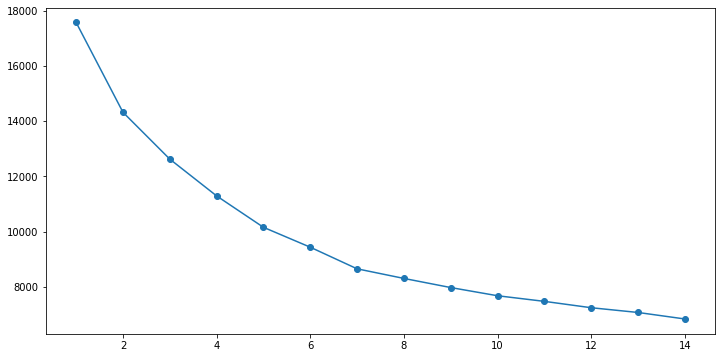

In [316]:
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters,clusters_df.cluster_errors,marker='o')
plt.show()

In [317]:
KMeans=KMeans(n_clusters=6,n_init=15,random_state=123)

In [318]:
KMeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [319]:
centroids=KMeans.cluster_centers_

In [320]:
centroids

array([[-4.84106702e-01,  6.89338676e-01, -8.33579969e-01,
        -1.89402178e-01, -6.10287451e-02, -4.20178089e-01,
        -4.13951243e-01, -6.32988485e-02,  4.29131900e-01,
        -3.92276211e-01, -4.13158553e-01],
       [ 1.34965662e+00, -6.73402306e-01,  1.12909778e+00,
         7.31083842e-02, -1.09725601e-02, -5.61823285e-01,
        -5.34285624e-01,  7.80558107e-01, -8.51129729e-01,
         3.37452404e-01,  1.63740731e-01],
       [-6.75354859e-01, -4.51931630e-01, -1.17499944e-01,
        -2.52951058e-01, -4.13452131e-01,  8.44040272e-02,
        -2.48241917e-01, -1.24843409e+00,  6.10810745e-01,
         1.52437211e-01,  1.31616549e+00],
       [-1.88637262e-01, -5.15830459e-02,  4.00212324e-01,
         4.24475937e+00,  2.06317774e-01,  1.58986899e+00,
         1.74222330e+00,  1.03540201e+00, -1.94548354e-01,
         8.53320395e-02, -3.15418918e-01],
       [-7.08056358e-02,  4.55603038e-02,  5.26630902e-02,
        -1.03912380e-01, -3.44245417e-02,  9.89520281e-01,
  

In [321]:
centroid_df=pd.DataFrame(centroids,columns=list(df_scaled))

In [322]:
centroid_df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,-0.484107,0.689339,-0.833580,-0.189402,-0.061029,-0.420178,-0.413951,-0.063299,0.429132,-0.392276,-0.413159
1,1.349657,-0.673402,1.129098,0.073108,-0.010973,-0.561823,-0.534286,0.780558,-0.851130,0.337452,0.163741
2,-0.675355,-0.451932,-0.117500,-0.252951,-0.413452,0.084404,-0.248242,-1.248434,0.610811,0.152437,1.316165
3,-0.188637,-0.051583,0.400212,4.244759,0.206318,1.589869,1.742223,1.035402,-0.194548,0.085332,-0.315419
4,-0.070806,0.045560,0.052663,-0.103912,-0.034425,0.989520,1.180217,0.215198,-0.134658,-0.198014,-0.584260
5,0.095416,0.002200,1.181553,-0.389872,5.784760,-0.049516,0.510330,0.180072,-1.735792,3.663412,-0.869731


In [323]:
KMeans.labels_ 

array([0, 0, 0, ..., 2, 0, 2])

In [324]:
pd.DataFrame(KMeans.labels_,columns=list(['labels']))

,labels
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,0
8,0
9,3


In [325]:
df_labels=pd.DataFrame(KMeans.labels_,columns=list(['labels']))
df_labels['labels']=df_labels['labels'].astype('category')

In [326]:
new_df_labeled=df2.join(df_labels)

In [327]:
df_analysis=(new_df_labeled.groupby(['labels'],axis=0)).head()
##to be converted back to dataframe
df_analysis

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,labels
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,3
11,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,3
13,7.8,0.610,0.29,1.6,0.114,9.0,29.0,0.9974,3.26,1.56,9.1,1
14,8.9,0.620,0.18,3.8,0.176,52.0,145.0,0.9986,3.16,0.88,9.2,4


In [328]:
new_df_labeled['labels'].value_counts()

0    531
1    362
4    333
2    299
3     46
5     28
Name: labels, dtype: int64

1. Use feautes fixed acidity and volatile acidity
2. Use feautes Cirtic acidity and fixed acidity
3. Use feautes residual suger and sulphades
4. Use feautes free.sulfur.dioxide and total.sulfur.dioxide
5. Use feautes fixed acidity, citric acidity and volatile acidity
5. Use feautes density and pH


# 1. Use feautes fixed acidity and volatile acidity

In [329]:
##we need to check which feature ooks same as that of intital quality data after labelling and all

In [330]:
df3=df.loc[:,'fixed_acidity':'volatile_acidity']

In [331]:
df_scaled=df3.apply(zscore)

In [332]:
df_scaled.head()

,fixed_acidity,volatile_acidity
0,-0.528360,0.961877
1,-0.298547,1.967442
2,-0.298547,1.297065
3,1.654856,-1.384443
4,-0.528360,0.961877


In [333]:

from sklearn.cluster import KMeans
clusters=KMeans(n_clusters=6,n_init=10) ##10times 1 cluster,10 times the 2 cluster and so on.
clusters.fit(df_scaled) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [334]:
KMeans=KMeans(n_clusters=6,n_init=15,random_state=123)

In [335]:
KMeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [336]:
centroids=KMeans.cluster_centers_

In [337]:
centroids

array([[-0.69892734,  0.53523907],
       [ 2.13179001, -0.56921183],
       [ 0.569678  , -1.0860611 ],
       [ 0.45021054,  0.34929453],
       [-0.72979347, -0.66903591],
       [-0.32951503,  2.01538314]])

In [338]:
centroid_df=pd.DataFrame(centroids,columns=list(df_scaled))

In [339]:
centroid_df

,fixed_acidity,volatile_acidity
0,-0.698927,0.535239
1,2.131790,-0.569212
2,0.569678,-1.086061
3,0.450211,0.349295
4,-0.729793,-0.669036
5,-0.329515,2.015383


In [340]:
KMeans.labels_ 

array([0, 5, 5, ..., 4, 0, 4])

In [341]:
df_labels=pd.DataFrame(KMeans.labels_,columns=list(['labels']))
df_labels['labels']=df_labels['labels'].astype('category')
new1_df_labeled=df2.join(df_labels)


In [342]:
# df_analysis=(new1_df_labeled.groupby(['labels'],axis=0)).head()
# ##to be converted back to dataframe
# df_analysis

In [343]:
new1_df_labeled['labels'].value_counts()

0    449
4    330
2    277
3    246
1    156
5    141
Name: labels, dtype: int64

# 2. Use feautes Cirtic acidity and fixed acidity

In [344]:
df4=df.loc[:,('fixed_acidity','citric_acid')]

In [345]:
df_scaled=df4.apply(zscore)

In [346]:
from sklearn.cluster import KMeans
clusters=KMeans(n_clusters=6,n_init=10) ##10times 1 cluster,10 times the 2 cluster and so on.
clusters.fit(df_scaled) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [347]:
KMeans=KMeans(n_clusters=6,n_init=15,random_state=123)
KMeans.fit(df_scaled)
KMeans.labels_ 

array([0, 0, 0, ..., 0, 0, 3])

In [348]:
centroids=KMeans.cluster_centers_
centroids

array([[-0.78767149, -1.13642102],
       [ 0.34838319, -0.25883973],
       [ 2.34379302,  1.57837053],
       [-0.09144925,  0.98999497],
       [ 1.08731317,  1.05623308],
       [-0.61797191, -0.05119292]])

In [349]:
centroid_df=pd.DataFrame(centroids,columns=list(df_scaled))
centroid_df

,fixed_acidity,citric_acid
0,-0.787671,-1.136421
1,0.348383,-0.258840
2,2.343793,1.578371
3,-0.091449,0.989995
4,1.087313,1.056233
5,-0.617972,-0.051193


In [350]:
KMeans.labels_

array([0, 0, 0, ..., 0, 0, 3])

In [351]:
df_labels=pd.DataFrame(KMeans.labels_,columns=list(['labels']))
df_labels['labels']=df_labels['labels'].astype('category')

In [352]:
new1_df_labeled=df4.join(df_labels)
# df_analysis=(new1_df_labeled.groupby(['labels'],axis=0)).head()
##to be converted back to dataframe
# df_analysis
new1_df_labeled

,fixed_acidity,citric_acid,labels
0,7.4,0.00,0
1,7.8,0.00,0
2,7.8,0.04,0
3,11.2,0.56,2
4,7.4,0.00,0
5,7.4,0.00,0
6,7.9,0.06,0
7,7.3,0.00,0
8,7.8,0.02,0
9,7.5,0.36,5


In [353]:
new1_df_labeled['labels'].value_counts()

0    483
5    318
1    246
4    222
3    215
2    115
Name: labels, dtype: int64

# 3. Use feautes residual suger and sulphades


In [360]:
df5=df.loc[:,('residual_sugar','sulphates')]
df5

,residual_sugar,sulphates
0,1.9,0.56
1,2.6,0.68
2,2.3,0.65
3,1.9,0.58
4,1.9,0.56
5,1.8,0.56
6,1.6,0.46
7,1.2,0.47
8,2.0,0.57
9,6.1,0.80


In [361]:
df_scaled=df5.apply(zscore)

In [362]:
from sklearn.cluster import KMeans
clusters=KMeans(n_clusters=6,n_init=10) ##10times 1 cluster,10 times the 2 cluster and so on.
clusters.fit(df_scaled) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [363]:
KMeans=KMeans(n_clusters=6,n_init=15,random_state=123)
KMeans.fit(df_scaled)
KMeans.labels_ 

array([1, 5, 5, ..., 0, 5, 5])

In [364]:
centroids=KMeans.cluster_centers_
centroids

array([[-2.25451526e-01,  1.10795700e+00],
       [-2.68608112e-01, -7.73757352e-01],
       [ 2.30181038e+00,  5.40900605e-03],
       [-2.61467615e-01,  3.96001556e+00],
       [ 7.66707900e+00, -3.19943545e-02],
       [-1.73341167e-01, -2.96924593e-02]])

In [365]:
df_labels=pd.DataFrame(KMeans.labels_,columns=list(['labels']))
df_labels['labels']=df_labels['labels'].astype('category')

In [366]:
new1_df_labeled=df4.join(df_labels)
# df_analysis=(new1_df_labeled.groupby(['labels'],axis=0)).head()
##to be converted back to dataframe
# df_analysis
new1_df_labeled

,fixed_acidity,citric_acid,labels
0,7.4,0.00,1
1,7.8,0.00,5
2,7.8,0.04,5
3,11.2,0.56,1
4,7.4,0.00,1
5,7.4,0.00,1
6,7.9,0.06,1
7,7.3,0.00,1
8,7.8,0.02,1
9,7.5,0.36,2


In [367]:
new1_df_labeled['labels'].value_counts()

1    583
5    571
0    290
2    107
3     37
4     11
Name: labels, dtype: int64

# 4. Use feautes free.sulfur.dioxide and total.sulfur.dioxide

In [370]:
df6=df.loc[:,('free_sulfur_dioxide','total_sulfur_dioxide')]

In [371]:
df_scaled=df6.apply(zscore)

In [375]:
from sklearn.cluster import KMeans
KMeans=KMeans(n_clusters=6,n_init=15,random_state=123)
KMeans.fit(df_scaled)
KMeans.labels_ 

array([0, 1, 0, ..., 1, 1, 0])

In [376]:
centroids=KMeans.cluster_centers_
centroids

array([[-0.09199399, -0.21643503],
       [ 1.2501484 ,  0.39053298],
       [-0.88379663, -0.82863156],
       [ 1.27878095,  2.54855474],
       [ 0.08846594,  1.23480152],
       [ 3.15104127,  1.49329946]])

In [377]:
df_labels=pd.DataFrame(KMeans.labels_,columns=list(['labels']))
df_labels['labels']=df_labels['labels'].astype('category')

In [378]:
new1_df_labeled=df6.join(df_labels)
# df_analysis=(new1_df_labeled.groupby(['labels'],axis=0)).head()
##to be converted back to dataframe
# df_analysis
new1_df_labeled

,free_sulfur_dioxide,total_sulfur_dioxide,labels
0,11.0,34.0,0
1,25.0,67.0,1
2,15.0,54.0,0
3,17.0,60.0,0
4,11.0,34.0,0
5,13.0,40.0,0
6,15.0,59.0,0
7,15.0,21.0,0
8,9.0,18.0,2
9,17.0,102.0,4


In [379]:
new1_df_labeled['labels'].value_counts()

2    582
0    469
1    250
4    175
3     83
5     40
Name: labels, dtype: int64

# 5. Use feautes fixed acidity, citric acidity and volatile acidity

In [385]:
df7=df.loc[:,('fixed_acidity','citric_acid','volatile_acidity')]

In [386]:
df_scaled=df7.apply(zscore)

In [387]:
from sklearn.cluster import KMeans
KMeans=KMeans(n_clusters=6,n_init=15,random_state=123)
KMeans.fit(df_scaled)
KMeans.labels_ 

array([2, 5, 5, ..., 2, 2, 4])

In [388]:
centroids=KMeans.cluster_centers_
centroids

array([[ 1.88669503e-01, -1.63148131e-03,  4.60380140e-01],
       [ 1.91311315e+00,  1.44035468e+00, -5.77690549e-01],
       [-7.87506638e-01, -1.08651095e+00,  4.49695355e-01],
       [ 3.66066182e-01,  9.26634297e-01, -1.06404835e+00],
       [-6.66748493e-01,  4.38954008e-02, -6.79039979e-01],
       [-3.93548531e-01, -8.54920599e-01,  2.07301366e+00]])

In [389]:
df_labels=pd.DataFrame(KMeans.labels_,columns=list(['labels']))
df_labels['labels']=df_labels['labels'].astype('category')

In [390]:
new1_df_labeled=df6.join(df_labels)
# df_analysis=(new1_df_labeled.groupby(['labels'],axis=0)).head()
##to be converted back to dataframe
# df_analysis
new1_df_labeled

,free_sulfur_dioxide,total_sulfur_dioxide,labels
0,11.0,34.0,2
1,25.0,67.0,5
2,15.0,54.0,5
3,17.0,60.0,1
4,11.0,34.0,2
5,13.0,40.0,2
6,15.0,59.0,2
7,15.0,21.0,2
8,9.0,18.0,2
9,17.0,102.0,4


In [391]:
new1_df_labeled['labels'].value_counts()

2    425
0    304
3    287
4    252
1    204
5    127
Name: labels, dtype: int64

# 5. Use feautes density and pH

In [392]:
df8=df.loc[:,('density','pH')]

In [394]:
df_scaled=df8.apply(zscore)
from sklearn.cluster import KMeans
KMeans=KMeans(n_clusters=6,n_init=15,random_state=123)
KMeans.fit(df_scaled)
KMeans.labels_ 

array([5, 3, 2, ..., 4, 0, 4])

In [395]:
centroids=KMeans.cluster_centers_
centroids

array([[-1.53835876,  1.78106805],
       [ 1.64365656, -1.08837657],
       [ 0.38891332, -0.07294451],
       [-0.14941248, -1.14785577],
       [-0.85162789,  0.21956203],
       [ 0.35039131,  1.17287981]])

In [396]:
df_labels=pd.DataFrame(KMeans.labels_,columns=list(['labels']))
df_labels['labels']=df_labels['labels'].astype('category')

In [397]:
new1_df_labeled=df6.join(df_labels)
# df_analysis=(new1_df_labeled.groupby(['labels'],axis=0)).head()
##to be converted back to dataframe
# df_analysis
new1_df_labeled

,free_sulfur_dioxide,total_sulfur_dioxide,labels
0,11.0,34.0,5
1,25.0,67.0,3
2,15.0,54.0,2
3,17.0,60.0,3
4,11.0,34.0,5
5,13.0,40.0,5
6,15.0,59.0,2
7,15.0,21.0,4
8,9.0,18.0,2
9,17.0,102.0,2


In [398]:
new1_df_labeled['labels'].value_counts()

2    414
4    402
3    268
5    225
1    185
0    105
Name: labels, dtype: int64